In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gsw
import importlib
import pdb
from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import Image
import matplotlib.colors as colors
from scipy.interpolate import griddata
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde
import xarray as xr
import matplotlib
import matplotlib.gridspec as gridspec 
from matplotlib.colorbar import Colorbar 

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/xarray/conventions.py:9: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [4]:
dfmg = pd.read_csv("dfmg.csv")
dfgamma = pd.read_csv("gamman.csv", names=['PROFILE_NUMBER', 'gamman'])
dfmg['gamman'] = dfgamma['gamman']
del dfmg['Unnamed: 0']
dfmg.loc[:,'JULD'] = pd.to_datetime(dfmg.loc[:, 'JULD'])
dfmg.loc[(dfmg['gamman'] < 0), "gamman"] = np.nan

In [5]:
import plot_theta_sal
importlib.reload(plot_theta_sal)

import plot_surfbot_vsTime as pltsurfbot
import plot_topView_contourf as topView

In [6]:
WSO_source = (dfmg['CTEMP'] <= -1.7 ) & (dfmg["PSAL_ADJUSTED"] > 34.5)
WSO_prod = (dfmg['CTEMP'] <= -0.8) & (dfmg['CTEMP'] >= -1.2) & (dfmg["PSAL_ADJUSTED"] > 34.5)

box1 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -60) & (dfmg["LONGITUDE"] < -40)
box2 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -40) & (dfmg["LONGITUDE"] < -20)
box3 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -60) & (dfmg["LONGITUDE"] < -40)
box4 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -40) & (dfmg["LONGITUDE"] < -20)

box5 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > 160) & (dfmg["LONGITUDE"] < 180)
box6 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -180) & (dfmg["LONGITUDE"] < -160)
box7 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > 160) & (dfmg["LONGITUDE"] < 180)
box8 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -180) & (dfmg["LONGITUDE"] < -160)

box9 = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 60) & (dfmg["LONGITUDE"] < 70)
box10 = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 70) & (dfmg["LONGITUDE"] < 82)

Weddell = (box1 | box2 | box3| box4)
Ross = (box5 | box6 | box7 | box8) & (dfmg.LATITUDE < -72.5)
Prydz = box10
EBS = (dfmg['LONGITUDE'] > -80) & (dfmg['LONGITUDE'] < -60) #Eastern Bellingshausen Sea
WBS = (dfmg['LONGITUDE'] > -100) & (dfmg['LONGITUDE'] < -80) # Western Bellingshausen Sea
BS = (EBS + WBS)
Adelie = (dfmg['LONGITUDE'] > 135) & (dfmg['LONGITUDE'] < 145) # Adelie Coast
Knox = (dfmg['LONGITUDE'] > 101) & (dfmg['LONGITUDE'] < 112) 
PrincessMartha = (dfmg['LONGITUDE'] > -20) & (dfmg['LONGITUDE'] < 0) & (dfmg.LATITUDE <= -65)
CDP = box9
WPB = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 70) & (dfmg["LONGITUDE"] < 75)
EPB = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 75) & (dfmg["LONGITUDE"] <= 82)
AmundsenEast = (dfmg.LONGITUDE <= -100) & (dfmg.LONGITUDE >= -110) & (dfmg.LATITUDE <= -70)
AmundsenWest = (dfmg.LONGITUDE <= -110) & (dfmg.LONGITUDE >= -120) & (dfmg.LATITUDE <= -70)
Amundsen = AmundsenEast + AmundsenWest
AS = (AmundsenEast + AmundsenWest)
LAC = (dfmg.LONGITUDE > 82) & (dfmg.LONGITUDE <= 87) & (dfmg.LATITUDE <= -65)# Leopold and Astrid Coast
QMC = (dfmg.LONGITUDE > 87) & (dfmg.LONGITUDE <= 96.5) & (dfmg.LATITUDE <= -65)# Wilhelm II Coast and Queen Mary Coast
Harald = (dfmg.LONGITUDE >= 29) & (dfmg.LONGITUDE <= 37) & (dfmg.LATITUDE <= -65)# Harald Coast

lowSurfSal = (dfmg['PSAL_ADJUSTED'] < 33.5) & (dfmg['DEPTH'] > -100)
ASW = (dfmg.CTEMP > -1.5) & (dfmg.PRES_ADJUSTED < 150) & (dfmg.POT_DENSITY < 27.4)
surfaceWaters = dfmg.PRES_ADJUSTED < 100

cdw = (dfmg['PSAL_ADJUSTED'] > 34.6) & (dfmg['CTEMP'] > 0)
maxTemp = (dfmg.groupby('PROFILE_NUMBER')['CTEMP'].transform(max) == dfmg['CTEMP'])
gline_le_50km = dfmg['DIST_GLINE'] <= 50
gline_le_100km = dfmg['DIST_GLINE'] <= 100
gline_le_150km = dfmg['DIST_GLINE'] <= 150
gline_le_25km = dfmg['DIST_GLINE'] <= 25
gline_le_75km = dfmg['DIST_GLINE'] <= 75

mask_theta_sal_not_nan = ~(dfmg.loc[:, 'CTEMP'].isnull() + dfmg.loc[:, 'PSAL_ADJUSTED'].isnull())

deepMask250 = dfmg.DEPTH <= -250
deepMask375 = dfmg.DEPTH <= -375
deepMask500 = dfmg.DEPTH <= -500

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


In [7]:
year_mask = []
years = np.sort(dfmg['JULD'].dt.year.unique())
for i in range(len(years)):
    mask = dfmg['JULD'].dt.year == years[i]
    year_mask.append(mask)
month_mask = []
for i in range(12):
    mask = dfmg['JULD'].dt.month == i+1
    month_mask.append(mask)
    
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [8]:
def sel_months(df, months=[1]):
    return df['JULD'].dt.month.isin(months)

def get_mask_from_prof_mask(df, profmask):
    profs = dfmg.loc[profmask, 'PROFILE_NUMBER'].unique()
    mask = dfmg.loc[:, 'PROFILE_NUMBER'].isin(profs)
    
    return mask

def play_beep():
    import os
    duration = 1  # second
    freq = 440  # Hz
    os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

In [9]:
DSW = (dfmg.gamman > 28.27) & (dfmg.PSAL_ADJUSTED > 34.4) & (dfmg.CTEMP <= -1.8)
lssw = (dfmg.PSAL_ADJUSTED >= 34.3) & (dfmg.PSAL_ADJUSTED <= 34.4) & (dfmg.CTEMP <= -1.5) & (dfmg.CTEMP > -1.9)
ISW = (dfmg.CTEMP < -1.9)

CDW = (dfmg.CTEMP >= 0) & (dfmg.PSAL_ADJUSTED >= 34.5)
mCDW = (dfmg.CTEMP < 0) & (dfmg.CTEMP > -1.8) & (dfmg.gamman > 28) & (dfmg.gamman < 28.27)

In [984]:
import plot_waterMassThickness as pltwmthk
importlib.reload(pltwmthk)

<module 'plot_waterMassThickness' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py'>

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:195: RuntimeWarning: invalid value encountered in greater
  CDWbins = ((salmean >= 34.5) & (thetamean >= 0.0) )                                         # common definition, also named as Warm Deep Water (WDW)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:195: RuntimeWarning: invalid value encountered in greater_equal
  CDWbins = ((salmean >= 34.5) & (thetamean >= 0.0) )                                         # common definition, also named as Warm Deep Water (WDW)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:195: RuntimeWarning: invalid value encountered in less_equal
  CDWbins = ((salmean >= 34.5) & (thetamean >= 0.0) )                                         # common definition, also named as Warm Deep Water (WDW)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:196: RuntimeWarning: invalid val

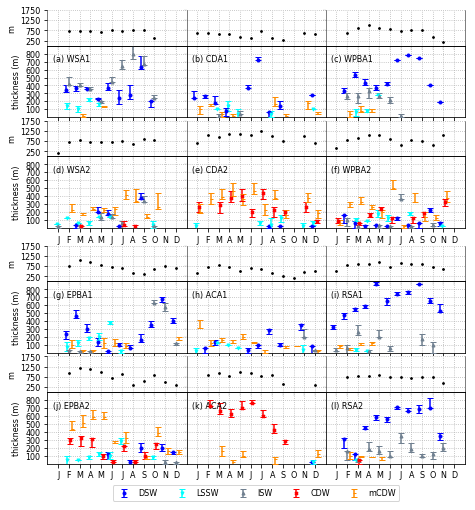

In [977]:
A1 = gline_le_75km
A2 = ~gline_le_75km

regions1 = [Weddell & A1, CDP & A1,    WPB & A1,   
            Weddell & A2, CDP & A2,    WPB & A2,   
            EPB & A1,     Adelie & A1, Ross & A1, 
            EPB & A2,     Adelie & A2, Ross & A2]

titles1 = ["(a) WSA1", "(b) CDA1", "(c) WPBA1",        
          "(d) WSA2", "(e) CDA2", "(f) WPBA2", 
          "(g) EPBA1","(h) ACA1", "(i) RSA1",
          "(j) EPBA2","(k) ACA2", "(l) RSA2" ] 

yticks = list(np.arange(100, 820, 100))
yticks_dod = list(np.arange(250,2000,500))
wmThk1_20 = pltwmthk.plot_array_waterMassThickness(dfmg,
            regions1, titles1, ht=9, save=True, ymax=900,
            savename="./Images/waterMassBudgets/array1_20.png", 
            yticks=yticks, zbin=20.0,
            retValue=True, yticks_dod=yticks_dod, ymax_dod=None)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:195: RuntimeWarning: invalid value encountered in greater
  CDWbins = ((salmean >= 34.5) & (thetamean >= 0.0) )                                         # common definition, also named as Warm Deep Water (WDW)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:195: RuntimeWarning: invalid value encountered in greater_equal
  CDWbins = ((salmean >= 34.5) & (thetamean >= 0.0) )                                         # common definition, also named as Warm Deep Water (WDW)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:195: RuntimeWarning: invalid value encountered in less_equal
  CDWbins = ((salmean >= 34.5) & (thetamean >= 0.0) )                                         # common definition, also named as Warm Deep Water (WDW)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:196: RuntimeWarning: invalid val

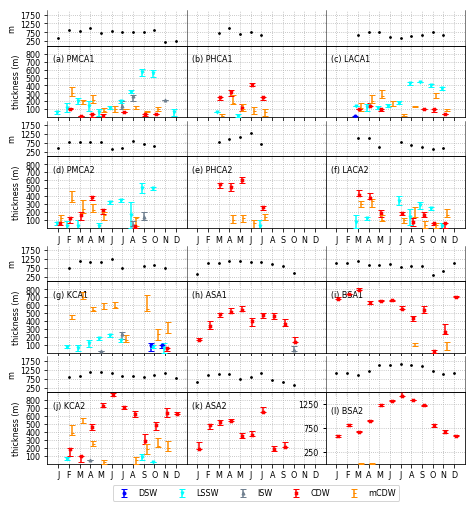

In [985]:
regions2 = [PrincessMartha & A1, Harald & A1, (LAC ) & A1,
            PrincessMartha & A2, Harald & A2, (LAC ) & A2,
            Knox & A1,  AS & A1, BS & A1, 
            Knox & A2, AS & A2, BS & A2]

titles2 = ["(a) PMCA1", "(b) PHCA1", "(c) LACA1", 
           "(d) PMCA2", "(e) PHCA2", "(f) LACA2",
           "(g) KCA1", "(h) ASA1", "(i) BSA1", 
           "(j) KCA2", "(k) ASA2", "(l) BSA2"]

yticks = list(np.arange(100, 820, 100)) 
yticks_dod = list(np.arange(250,2000,500))
wmThk2_20 = pltwmthk.plot_array_waterMassThickness(dfmg, 
            regions2, titles2, ht=9, save=True, ymax=900, retValue = True, zbin=20.0,
            savename="./Images/waterMassBudgets/array2_20.png", yticks=yticks, 
            yticks_dod=yticks_dod, ymax_dod=2000)

In [981]:
selMask = (waterMassThickness_20.region == "BSA2") & (waterMassThickness_20.month == 7)
waterMassThickness_20[selMask]

,CDW,CDW_CI,DSW,DSW_CI,ISW,ISW_CI,LSSW,LSSW_CI,mCDW,mCDW_CI,month,region,zlowest
282,1421.216354,"[1421.21635428, 1501.28488128]",0.0,"[0.0, 0.0]",0.0,"[0.0, 0.0]",0.0,"[0.0, 0.0]",0.0,"[0.0, 0.0]",7,BSA2,1601.37054


In [541]:
DSWthickness12 = np.append(wmThk1_20[0].ravel(), wmThk2_20[0].ravel())
DSW_CI_12 = list(np.array((list(wmThk1_20[1]) + list(wmThk2_20[1]) )).reshape(288,2))

ISWthickness12 = np.append(wmThk1_20[4].ravel(), wmThk2_20[4].ravel())
ISW_CI_12 = list(np.array(list(wmThk1_20[5]) + list(wmThk2_20[5]) ).reshape(288,2))

lsswthickness12 = np.append(wmThk1_20[2].ravel(), wmThk2_20[2].ravel())
lssw_CI_12 = list(np.array(list(wmThk1_20[3]) + list(wmThk2_20[3]) ).reshape(288,2))

CDWthickness12 = np.append(wmThk1_20[8].ravel(), wmThk2_20[8].ravel())
CDW_CI_12 = list(np.array(list(wmThk1_20[9]) + list(wmThk2_20[9]) ).reshape(288,2))

mCDWthickness12 = np.append(wmThk1_20[6].ravel(), wmThk2_20[6].ravel())
mCDW_CI_12 = list(np.array(list(wmThk1_20[7]) + list(wmThk2_20[7]) ).reshape(288,2))

zlowest12 = np.append(zlowest1.ravel(), zlowest2.ravel())

titles = []
for t in titles1:
    titles.append([t.split()[1] ]*12)
for t in titles2:
    titles.append([t.split()[1] ]*12)

ind = np.arange(len(DSWthickness12))
waterMassThickness_20 = pd.DataFrame({'DSW':pd.Series(DSWthickness12, index=ind),
                                   'DSW_CI':pd.Series(DSW_CI_12, index=ind),
                                   'ISW':pd.Series(ISWthickness12, index=ind),
                                   'ISW_CI':pd.Series(ISW_CI_12, index=ind),
                                   'LSSW':pd.Series(lsswthickness12, index=ind),
                                   'LSSW_CI':pd.Series(lssw_CI_12, index=ind),
                                   'mCDW':pd.Series(mCDWthickness12, index=ind),
                                   'mCDW_CI':pd.Series(mCDW_CI_12, index=ind),
                                   'CDW':pd.Series(CDWthickness12, index=ind),
                                   'CDW_CI':pd.Series(CDW_CI_12, index=ind),
                                   'zlowest':pd.Series(zlowest12, index=ind),
                                   'month':pd.Series(list(np.arange(1,13,1))*(len(DSWthickness1) + len(DSWthickness2)), index=ind),
                                   'region': pd.Series(np.array(titles).ravel(), index=ind)
                                  })

In [536]:
## Plays a beep sound. Useful to notify once any script is done running
def play_beep():
    import os
    duration = 1  # second
    freq = 440  # Hz
    os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))
play_beep()

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:192: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) )                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:192: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) )                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:192: RuntimeWarning: invalid value encountered in less_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) )                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:193: RuntimeWarning: invalid value encountered in greater_equal
  lsswbins = ( (salmean >= 34.3) & (salmean <= 34.4) & (thetamean <= -

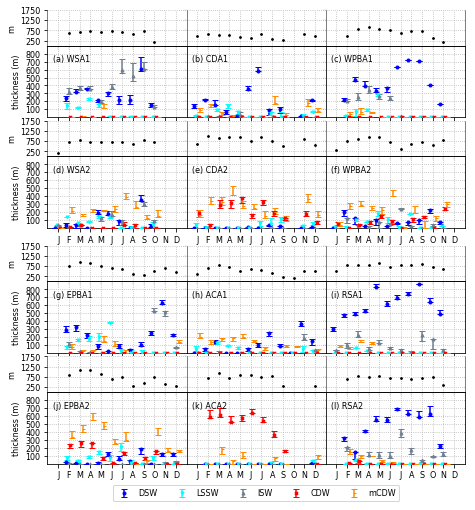

In [535]:
A1 = gline_le_75km
A2 = ~gline_le_75km

regions1 = [Weddell & A1, CDP & A1,    WPB & A1,   
            Weddell & A2, CDP & A2,    WPB & A2,   
            EPB & A1,     Adelie & A1, Ross & A1, 
            EPB & A2,     Adelie & A2, Ross & A2]

titles1 = ["(a) WSA1", "(b) CDA1", "(c) WPBA1",        
          "(d) WSA2", "(e) CDA2", "(f) WPBA2", 
          "(g) EPBA1","(h) ACA1", "(i) RSA1",
          "(j) EPBA2","(k) ACA2", "(l) RSA2" ] 

yticks = list(np.arange(100, 820, 100))
yticks_dod = list(np.arange(250,2000,500))
wmThk1_10 = pltwmthk.plot_array_waterMassThickness(dfmg,
            regions1, titles1, ht=9, save=True, ymax=900,
            savename="./Images/waterMassBudgets/array1_10.png", 
            yticks=yticks, zbin=10.0,
            retValue=True, yticks_dod=yticks_dod, ymax_dod=None)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:192: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) )                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:192: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) )                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:192: RuntimeWarning: invalid value encountered in less_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) )                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:193: RuntimeWarning: invalid value encountered in greater_equal
  lsswbins = ( (salmean >= 34.3) & (salmean <= 34.4) & (thetamean <= -

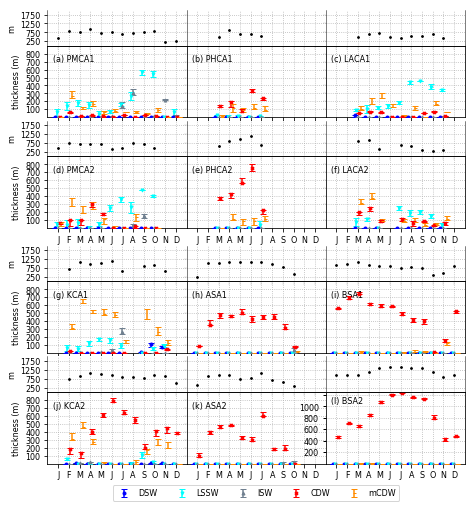

In [493]:
regions2 = [PrincessMartha & A1, Harald & A1, (LAC ) & A1,
            PrincessMartha & A2, Harald & A2, (LAC ) & A2,
            Knox & A1,  AS & A1, BS & A1, 
            Knox & A2, AS & A2, BS & A2]

titles2 = ["(a) PMCA1", "(b) PHCA1", "(c) LACA1", 
           "(d) PMCA2", "(e) PHCA2", "(f) LACA2",
           "(g) KCA1", "(h) ASA1", "(i) BSA1", 
           "(j) KCA2", "(k) ASA2", "(l) BSA2"]

yticks = list(np.arange(100, 820, 100)) 
yticks_dod = list(np.arange(250,2000,500))
wmThk2_10 = pltwmthk.plot_array_waterMassThickness(dfmg, 
            regions2, titles2, ht=9, save=True, ymax=900, retValue = True, zbin=10.0,
            savename="./Images/waterMassBudgets/array2_10.png", yticks=yticks, 
            yticks_dod=yticks_dod, ymax_dod=2000)

In [494]:
DSWthickness12 = np.append(wmThk1_10[0].ravel(), wmThk2_10[0].ravel())
DSW_CI_12 = list(np.array((list(wmThk1_10[1]) + list(wmThk2_10[1]) )).reshape(288,2))

ISWthickness12 = np.append(wmThk1_10[4].ravel(), wmThk2_10[4].ravel())
ISW_CI_12 = list(np.array(list(wmThk1_10[5]) + list(wmThk2_10[5]) ).reshape(288,2))

lsswthickness12 = np.append(wmThk1_10[2].ravel(), wmThk2_10[2].ravel())
lssw_CI_12 = list(np.array(list(wmThk1_10[3]) + list(wmThk2_10[3]) ).reshape(288,2))

CDWthickness12 = np.append(wmThk1_10[8].ravel(), wmThk2_10[8].ravel())
CDW_CI_12 = list(np.array(list(wmThk1_10[9]) + list(wmThk2_10[9]) ).reshape(288,2))

mCDWthickness12 = np.append(wmThk1_10[6].ravel(), wmThk2_10[6].ravel())
mCDW_CI_12 = list(np.array(list(wmThk1_10[7]) + list(wmThk2_10[7]) ).reshape(288,2))

zlowest12 = np.append(zlowest1.ravel(), zlowest2.ravel())

titles = []
for t in titles1:
    titles.append([t.split()[1] ]*12)
for t in titles2:
    titles.append([t.split()[1] ]*12)

ind = np.arange(len(DSWthickness12))
waterMassThickness_10 = pd.DataFrame({'DSW':pd.Series(DSWthickness12, index=ind),
                                   'DSW_CI':pd.Series(DSW_CI_12, index=ind),
                                   'ISW':pd.Series(ISWthickness12, index=ind),
                                   'ISW_CI':pd.Series(ISW_CI_12, index=ind),
                                   'LSSW':pd.Series(lsswthickness12, index=ind),
                                   'LSSW_CI':pd.Series(lssw_CI_12, index=ind),
                                   'mCDW':pd.Series(mCDWthickness12, index=ind),
                                   'mCDW_CI':pd.Series(mCDW_CI_12, index=ind),
                                   'CDW':pd.Series(CDWthickness12, index=ind),
                                   'CDW_CI':pd.Series(CDW_CI_12, index=ind),
                                   'zlowest':pd.Series(zlowest12, index=ind),
                                   'month':pd.Series(list(np.arange(1,13,1))*(len(DSWthickness1) + len(DSWthickness2)), index=ind),
                                   'region': pd.Series(np.array(titles).ravel(), index=ind)
                                  })

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:192: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) )                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:192: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) )                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:192: RuntimeWarning: invalid value encountered in less_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) )                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:193: RuntimeWarning: invalid value encountered in greater_equal
  lsswbins = ( (salmean >= 34.3) & (salmean <= 34.4) & (thetamean <= -

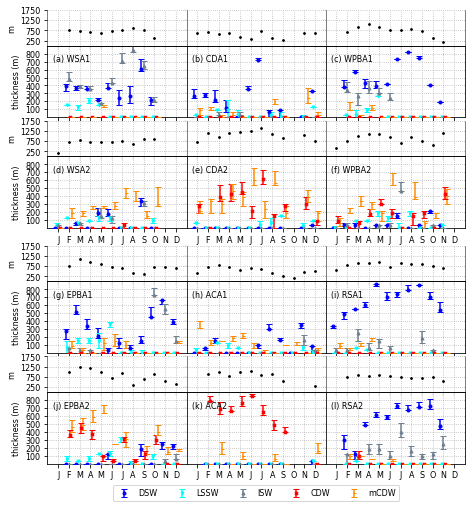

In [495]:
A1 = gline_le_75km
A2 = ~gline_le_75km

regions1 = [Weddell & A1, CDP & A1,    WPB & A1,   
            Weddell & A2, CDP & A2,    WPB & A2,   
            EPB & A1,     Adelie & A1, Ross & A1, 
            EPB & A2,     Adelie & A2, Ross & A2]

titles1 = ["(a) WSA1", "(b) CDA1", "(c) WPBA1",        
          "(d) WSA2", "(e) CDA2", "(f) WPBA2", 
          "(g) EPBA1","(h) ACA1", "(i) RSA1",
          "(j) EPBA2","(k) ACA2", "(l) RSA2" ] 

yticks = list(np.arange(100, 820, 100))
yticks_dod = list(np.arange(250,2000,500))
wmThk1_30 = pltwmthk.plot_array_waterMassThickness(dfmg,
            regions1, titles1, ht=9, save=True, ymax=900,
            savename="./Images/waterMassBudgets/array1_30.png", 
            yticks=yticks, zbin=30.0,
            retValue=True, yticks_dod=yticks_dod, ymax_dod=None)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:192: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) )                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:192: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) )                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:192: RuntimeWarning: invalid value encountered in less_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) )                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:193: RuntimeWarning: invalid value encountered in greater_equal
  lsswbins = ( (salmean >= 34.3) & (salmean <= 34.4) & (thetamean <= -

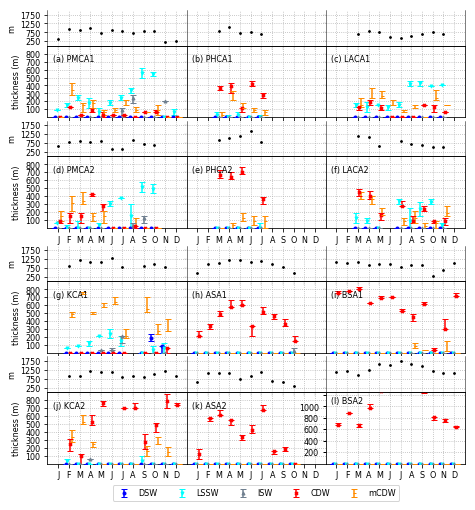

In [496]:
regions2 = [PrincessMartha & A1, Harald & A1, (LAC ) & A1,
            PrincessMartha & A2, Harald & A2, (LAC ) & A2,
            Knox & A1,  AS & A1, BS & A1, 
            Knox & A2, AS & A2, BS & A2]

titles2 = ["(a) PMCA1", "(b) PHCA1", "(c) LACA1", 
           "(d) PMCA2", "(e) PHCA2", "(f) LACA2",
           "(g) KCA1", "(h) ASA1", "(i) BSA1", 
           "(j) KCA2", "(k) ASA2", "(l) BSA2"]

yticks = list(np.arange(100, 820, 100)) 
yticks_dod = list(np.arange(250,2000,500))
wmThk2_30 = pltwmthk.plot_array_waterMassThickness(dfmg, 
            regions2, titles2, ht=9, save=True, ymax=900, retValue = True, zbin=30.0,
            savename="./Images/waterMassBudgets/array2_30.png", yticks=yticks, 
            yticks_dod=yticks_dod, ymax_dod=2000)

In [497]:
DSWthickness12 = np.append(wmThk1_30[0].ravel(), wmThk2_30[0].ravel())
DSW_CI_12 = list(np.array((list(wmThk1_30[1]) + list(wmThk2_30[1]) )).reshape(288,2))

ISWthickness12 = np.append(wmThk1_30[4].ravel(), wmThk2_30[4].ravel())
ISW_CI_12 = list(np.array(list(wmThk1_30[5]) + list(wmThk2_30[5]) ).reshape(288,2))

lsswthickness12 = np.append(wmThk1_30[2].ravel(), wmThk2_30[2].ravel())
lssw_CI_12 = list(np.array(list(wmThk1_30[3]) + list(wmThk2_30[3]) ).reshape(288,2))

CDWthickness12 = np.append(wmThk1_30[8].ravel(), wmThk2_30[8].ravel())
CDW_CI_12 = list(np.array(list(wmThk1_30[9]) + list(wmThk2_30[9]) ).reshape(288,2))

mCDWthickness12 = np.append(wmThk1_30[6].ravel(), wmThk2_30[6].ravel())
mCDW_CI_12 = list(np.array(list(wmThk1_30[7]) + list(wmThk2_30[7]) ).reshape(288,2))

zlowest12 = np.append(zlowest1.ravel(), zlowest2.ravel())

titles = []
for t in titles1:
    titles.append([t.split()[1] ]*12)
for t in titles2:
    titles.append([t.split()[1] ]*12)

ind = np.arange(len(DSWthickness12))
waterMassThickness_30 = pd.DataFrame({'DSW':pd.Series(DSWthickness12, index=ind),
                                   'DSW_CI':pd.Series(DSW_CI_12, index=ind),
                                   'ISW':pd.Series(ISWthickness12, index=ind),
                                   'ISW_CI':pd.Series(ISW_CI_12, index=ind),
                                   'LSSW':pd.Series(lsswthickness12, index=ind),
                                   'LSSW_CI':pd.Series(lssw_CI_12, index=ind),
                                   'mCDW':pd.Series(mCDWthickness12, index=ind),
                                   'mCDW_CI':pd.Series(mCDW_CI_12, index=ind),
                                   'CDW':pd.Series(CDWthickness12, index=ind),
                                   'CDW_CI':pd.Series(CDW_CI_12, index=ind),
                                   'zlowest':pd.Series(zlowest12, index=ind),
                                   'month':pd.Series(list(np.arange(1,13,1))*(len(DSWthickness1) + len(DSWthickness2)), index=ind),
                                   'region': pd.Series(np.array(titles).ravel(), index=ind)
                                  })

In [509]:
len(waterMassThickness_10.dropna())

239

In [510]:
def find_RMSE(waterMassThickness_XX, waterMassThickness_YY):
    rmse_DSW = np.sqrt( np.nansum(waterMassThickness_XX.DSW - waterMassThickness_YY.DSW)**2 / 
                       float(len(waterMassThickness_XX.dropna())) )

    rmse_lssw = np.sqrt( np.nansum(waterMassThickness_XX.LSSW - waterMassThickness_YY.LSSW)**2 / 
                        float(len(waterMassThickness_XX.dropna())) )

    rmse_ISW = np.sqrt( np.nansum(waterMassThickness_XX.ISW - waterMassThickness_YY.ISW)**2 / 
                       float(len(waterMassThickness_XX.dropna())) )

    rmse_mCDW = np.sqrt( np.nansum(waterMassThickness_XX.mCDW - waterMassThickness_YY.mCDW)**2 / 
                        float(len(waterMassThickness_XX.dropna())) )

    rmse_CDW = np.sqrt( np.nansum(waterMassThickness_XX.CDW - waterMassThickness_YY.CDW)**2 / 
                       float(len(waterMassThickness_XX.dropna())) )

    print(rmse_DSW, rmse_lssw, rmse_ISW, rmse_mCDW, rmse_CDW)

In [542]:
play_beepeep()

In [512]:
find_RMSE(waterMassThickness_30, waterMassThickness_20)

59.6987274023 15.4729560739 6.61403550667 62.2747689139 319.875985267


In [514]:
waterMassThickness_20.columns

Index(['CDW', 'CDW_CI', 'DSW', 'DSW_CI', 'ISW', 'ISW_CI', 'LSSW', 'LSSW_CI',
       'mCDW', 'mCDW_CI', 'month', 'region', 'zlowest'],
      dtype='object')

In [543]:
regionMask = waterMassThickness_20.region == "WPBA1"
timeMask = waterMassThickness_20.month == 8

waterMassThickness_20.loc[regionMask & timeMask]

,CDW,CDW_CI,DSW,DSW_CI,ISW,ISW_CI,LSSW,LSSW_CI,mCDW,mCDW_CI,month,region,zlowest
31,0.0,"[0.0, 0.0]",786.153675,"[786.153675305, 786.153675305]",0.0,"[0.0, 0.0]",0.0,"[0.0, 0.0]",0.0,"[0.0, 0.0]",8,WPBA1,786.153675


In [618]:
exArray = np.random.randn(10,3)
exArray[0:5, 0] = 5
exArray[5:, 0] = np.random.randn(5) + 10
exArray[:, 1] = np.random.randn(10) - 10
exArray[:, 2] = np.random.randn(10) + 100

In [619]:
randidxr = np.random.choice(len(exArray), (len(exArray), 10), replace=True)

In [609]:
randidxr

array([[1, 7, 2, 0, 8, 9, 7, 9, 5, 7],
       [1, 2, 3, 7, 3, 6, 0, 3, 1, 8],
       [7, 9, 4, 4, 5, 3, 4, 3, 5, 9],
       [2, 3, 4, 3, 1, 7, 8, 8, 1, 3],
       [8, 2, 1, 9, 1, 2, 2, 6, 8, 8],
       [0, 1, 0, 0, 7, 2, 4, 9, 4, 1],
       [4, 5, 2, 1, 7, 2, 8, 9, 5, 8],
       [8, 3, 3, 2, 7, 5, 7, 9, 9, 8],
       [2, 5, 3, 8, 1, 0, 2, 7, 2, 9],
       [3, 1, 8, 6, 3, 5, 7, 7, 3, 5]])

In [620]:
np.mean(exArray[randidxr], axis=0)

array([[   7.34062876,   -9.30551712,   99.80201824],
       [   7.90240267,   -9.76607694,   99.97203385],
       [   7.59010005,   -9.69357314,   99.95255169],
       [   6.39136285,   -9.25316958,   99.97882788],
       [   9.01026516,   -9.78128904,   99.57505673],
       [   6.4341868 ,   -9.59300144,  100.13694471],
       [   7.87919156,   -9.3808759 ,   99.83554618],
       [   8.3856697 ,   -9.71832483,   99.98510688],
       [   7.43969395,   -9.23413086,  100.22079736],
       [   8.44715327,   -9.97651475,  100.08201399]])

In [581]:
############### BOOTSTRAPPER FUNCTION #############################
def resample_depthbinData(timeDepthSliced, reps=1000):
    sliceArray = timeDepthSliced.loc[:, ["PSAL_ADJUSTED", "CTEMP", "gamman"] ].values
    try:
        randidxr = np.random.choice(len(sliceArray), (len(sliceArray), reps), replace=True )
        return np.nanmean(sliceArray[randidxr] , axis=0)
    except:
        return np.full_like(np.zeros((reps, 3)), np.nan)
###################################################################

In [544]:
timeSlice = dfmg.loc[WPB & gline_le_75km & sel_months(dfmg, [8])]

In [545]:
zbin = 20
ctempnonull = timeSlice.CTEMP.notnull()
zlowest = timeSlice.loc[ctempnonull, "DEPTH"].min()
nbins = abs(zlowest) // zbin
zbin_exact = abs(zlowest) / float(nbins)
print(len(timeSlice.loc[ctempnonull, "PROFILE_NUMBER"].unique()))

187


In [598]:
len(timeSlice[ctempnonull].groupby(pd.cut(timeSlice[ctempnonull].DEPTH, np.linspace(zlowest-1, 0, nbins) ) ).\
    CTEMP.count().nonzero()[0]) * zbin_exact

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


786.15367530472474

In [600]:
try:
    del(MCmeans)
except:
    pass
MCmeans = np.stack(timeSlice.groupby(pd.cut(timeSlice.DEPTH, np.linspace(zlowest-1, 0, nbins) ) ).apply(resample_depthbinData, 
                                                                                       reps=5000).values)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  """


In [562]:
salmean = timeSlice.groupby(pd.cut(timeSlice.DEPTH, np.linspace(zlowest-1, 0, nbins) ) ).PSAL_ADJUSTED.mean()
thetamean = timeSlice.groupby(pd.cut(timeSlice.DEPTH, np.linspace(zlowest-1, 0, nbins) ) ).CTEMP.mean()
gammamean = timeSlice.groupby(pd.cut(timeSlice.DEPTH, np.linspace(zlowest-1, 0, nbins) ) ).gamman.mean()

DSWthickness = len(( (salmean > 34.4) & (thetamean <= -1.8) & (gammamean >=28.27) ).nonzero()[0]) * zbin_exact
lsswthickness = len(( (salmean >= 34.3) & (salmean <= 34.4) & (thetamean <= -1.5) & (thetamean > -1.9) ).nonzero()[0]) * zbin_exact
ISWthickness = len(( (thetamean < -1.9)).nonzero()[0]) * zbin_exact
mCDWthickness = len(((thetamean > -1.8) & (thetamean < 0) & (gammamean > 28) & (gammamean < 28.27) ).nonzero()[0] ) * zbin_exact
CDWthickness = len(((salmean >= 34.5) & (thetamean >= 0.0) ).nonzero()[0]) * zbin_exact

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


In [599]:
DSWthickness

786.15367530472474

In [601]:
DSWbool = ((MCmeans[:, :, 0] > 34.4) & (MCmeans[:,:, 1] <= -1.8) & (MCmeans[:,:,2] >=28.27))
DSWbootstrapped = np.nansum(DSWbool, axis=0) * zbin_exact
DSWdelta = DSWbootstrapped - DSWthickness
DSW_CI =  DSWthickness - np.percentile(np.sort(DSWdelta), [2.5, 97.5])[::-1]
DSW_yerr = [abs(DSWthickness - DSW_CI[0]), abs(DSWthickness - DSW_CI[1]) ]

In [602]:
DSW_CI

array([ 786.1536753,  786.1536753])

In [422]:
waterMassThickness.loc[selectData, "DSW"].values

array([ 450.])

In [423]:
DSWdelta = DSWbootstrapped - DSWthickness

In [424]:
np.percentile(np.sort(DSWdelta) , [2.5, 97.5])[::-1]

array([ 79.79811916, -99.74764895])

In [329]:
DSWthickness - np.percentile(np.sort(DSWdelta), [2.5, 97.5])[::-1]

array([ 453.20519741,  512.31891882])

In [337]:
lsswbool = ( (MCmeans[:,:,0] >= 34.3) & (MCmeans[:,:,0] <= 34.4) & (MCmeans[:,:,1] <= -1.5) & (MCmeans[:,:,1] > -1.9) )                  # Schodlok et al. 2015
lsswbootstrapped = np.nansum(lsswbool, axis=0) * zbin_exact
lsswdelta = lsswbootstrapped - lsswthickness
lssw_CI =  lsswthickness - np.percentile(np.sort(lsswdelta), [2.5, 97.5])[::-1]

In [344]:
np.arange(10) - np.arange(10)[5]

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

In [525]:
CDWbool = ((MCmeans[:,:,0] >= 34.5) & (MCmeans[:,:,1] >= 0.0) )                                         # common definition, also named as Warm Deep Water (WDW)
CDWbootstrapped = np.nansum(CDWbool, axis=0) * zbin_exact
CDWdelta = CDWbootstrapped - CDWthickness
CDW_CI =  CDWthickness - np.percentile(np.sort(CDWdelta), [2.5, 97.5])[::-1]
CDW_yerr = [abs(CDWthickness - CDW_CI[0]), abs(CDWthickness - CDW_CI[1])]

In [526]:
CDW_CI

array([ 650.86625218,  671.20582256])

In [341]:
mCDWbool = ((MCmeans[:,:,1] > -1.8) & (MCmeans[:,:,1] < 0) & (MCmeans[:,:,2] > 28) & (MCmeans[:,:,2] < 28.27) ) # Williams 2016
mCDWbootstrapped = np.nansum(mCDWbool, axis=0) * zbin_exact
mCDWdelta = mCDWbootstrapped - mCDWthickness
mCDW_CI =  mCDWthickness - np.percentile(np.sort(mCDWdelta), [2.5, 97.5])[::-1]

In [425]:
ISWbool = ( (MCmeans[:,:,1] < -1.9))
ISWbootstrapped = np.nansum(ISWbool, axis=0) * zbin_exact
ISWdelta = ISWbootstrapped - ISWthickness
ISW_CI =  ISWthickness - np.percentile(np.sort(ISWdelta), [2.5, 97.5])[::-1]
ISW_yerr = np.percentile(np.sort(ISWdelta), [2.5, 97.5])[::-1]

## Sample bootstrapped probability calculations

In [666]:
import numpy.ma as ma

In [621]:
dfwm = waterMassThickness_20

In [689]:
for m in range(1,13, 1):
    selMask = ( (dfwm.month.isin([m]) ) & (dfwm["DSW"].notnull()) )
    print(len(( ((dfwm[selMask].DSW >0)) & (dfwm[selMask].CDW.lt(20))).nonzero()[0] ))

2
8
6
6
6
8
8
7
8
7
6
5


In [776]:
selMask = ( (dfwm.month.isin([12,1,2,3,4,5]) ) & (dfwm["DSW"].notnull()) )
#selMask = ( (dfwm.month.isin([6,7,8,9,10,11]) ) & (dfwm["DSW"].notnull()) )

In [816]:
totalLength = float(len(dfwm.loc[selMask]))

In [778]:
totalLength

114

In [779]:
seldDSW = dfwm[selMask].DSW.values
seldCDW = dfwm[selMask].CDW.values

$P(DSW\, |\, noCDW) = \frac{P(DSW\, \cap\, noCDW)}{P(noCDW)}$

In [824]:
probDSW_cap_NoCDW = len(seldDSW[seldCDW == 0].nonzero()[0]) / float(totalLength)
prob_noCDW = len(seldCDW[seldCDW == 0]) / float(totalLength)
prob_DSW_cond_noCDW = probDSW_cap_NoCDW / prob_noCDW
print(prob_DSW_cond_noCDW)

0.7021276595744681


In [812]:
reps = 10000
randidxr = np.random.choice(len(seldDSW[seldCDW == 0]), (len(seldDSW[seldCDW==0]), reps), replace=True)
MC_DSW_cap_NoCDW = seldDSW[seldCDW==0][randidxr]
MCprob_DSW_cap_noCDW = np.count_nonzero(MC_DSW_cap_NoCDW, axis=0) / float(len(seldCDW))

randidxr = np.random.choice(len(seldCDW), (len(seldCDW), reps), replace=True)
MC_CDW = seldCDW[randidxr]
MC_prob_noCDW = (ma.count(ma.masked_array(MC_CDW, mask=~(MC_CDW==0) ), axis=0) / float(len(seldCDW)))
MC_prob_DSW_cond_noCDW = MCprob_DSW_cap_noCDW / MC_prob_noCDW
np.percentile(MC_prob_DSW_cond_noCDW, [2.5, 97.5])

array([ 0.52727273,  0.94736842])

In [866]:
delta = prob_DSW_cond_noCDW - np.percentile(MC_prob_DSW_cond_noCDW, [2.5, 97.5])
print(prob_DSW_cond_noCDW - delta[0] , prob_DSW_cond_noCDW - delta[1])

0.527272727273 0.947368421053


In [813]:
probCDW_cap_NoDSW = len(seldCDW[seldDSW == 0].nonzero()[0]) / float(totalLength)
print(probCDW_cap_NoDSW)

0.5263157894736842


In [814]:
prob_noDSW = len(seldDSW[seldDSW == 0]) / float(totalLength)
print(prob_noDSW)

0.6491228070175439


In [792]:
prob_CDW_cond_noDSW = probCDW_cap_NoDSW / prob_noDSW
print(prob_CDW_cond_noDSW)

0.8108108108108107


In [815]:
reps = 10000
randidxr = np.random.choice(len(seldCDW[seldDSW == 0]), (len(seldCDW[seldDSW==0]), reps), replace=True)
MC_CDW_cap_NoDSW = seldCDW[seldDSW==0][randidxr]
MCprob_CDW_cap_noDSW = np.count_nonzero(MC_CDW_cap_NoDSW, axis=0) / float(len(seldCDW))

randidxr = np.random.choice(len(seldDSW), (len(seldDSW), reps), replace=True)
MC_DSW = seldDSW[randidxr]
MC_prob_noDSW = (ma.count(ma.masked_array(MC_DSW, mask=~(MC_DSW==0) ), axis=0) / float(len(seldDSW)))
MC_prob_CDW_cond_noDSW = MCprob_CDW_cap_noDSW / MC_prob_noDSW
np.percentile(MC_prob_CDW_cond_noDSW, [2.5, 97.5])

array([ 0.67857143,  0.96923077])

In [817]:
prob_DSW_cap_CDW = len(seldDSW[seldCDW > 0].nonzero()[0]) / totalLength
prob_CDW = len(seldCDW.nonzero()[0]) / totalLength
prob_DSW_cond_CDW = prob_DSW_cap_CDW / prob_CDW
print(prob_DSW_cond_CDW)

0.10447761194029849


In [819]:
reps = 10000
randidxr = np.random.choice(len(seldDSW[seldCDW > 0]), (len(seldDSW[seldCDW > 0]), reps), replace=True)
MC_DSW_cap_CDW = seldDSW[seldCDW > 0][randidxr]
MCprob_DSW_cap_CDW = np.count_nonzero(MC_DSW_cap_CDW, axis=0) / totalLength

MC_prob_CDW = ma.count(ma.masked_array(MC_CDW, mask=(MC_CDW==0) ), axis=0) / totalLength
MC_prob_DSW_cond_CDW = MCprob_DSW_cap_CDW / MC_prob_CDW
np.percentile(MC_prob_DSW_cond_CDW, [2.5, 97.5])

array([ 0.03797468,  0.18752264])

In [820]:
probCDW_cap_DSW = len(seldCDW[seldDSW > 0].nonzero()[0]) / float(totalLength)
prob_DSW = len(seldDSW[seldDSW > 0]) / float(totalLength)
prob_CDW_cond_DSW = probCDW_cap_DSW / prob_DSW
print(prob_CDW_cond_DSW)

0.175


In [823]:
reps = 10000
randidxr = np.random.choice(len(seldCDW[seldDSW > 0]), (len(seldCDW[seldDSW > 0]), reps), replace=True)
MC_CDW_cap_DSW = seldCDW[seldDSW > 0][randidxr]
MC_prob_CDW_cap_DSW = np.count_nonzero(MC_CDW_cap_DSW, axis=0) / totalLength

MC_prob_DSW = ma.count(ma.masked_array(MC_DSW, mask=(MC_DSW==0) ), axis=0) / totalLength
MC_prob_CDW_cond_DSW = MC_prob_CDW_cap_DSW / MC_prob_DSW
np.percentile(MC_prob_CDW_cond_DSW, [2.5, 97.5])

array([ 0.06379654,  0.32003571])

In [1019]:
import compute_waterMassProbabilities as wmprob
importlib.reload(wmprob)

<module 'compute_waterMassProbabilities' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/compute_waterMassProbabilities.py'>

[ 0.10447761  0.171875  ] [[ 0.06551657  0.08392819]
 [ 0.08854167  0.10590278]]


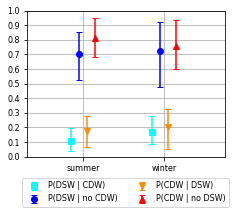

 P(DSW | CDW)= [ 0.10447761  0.171875  ] [[ 0.03896104  0.1884058 ]
 [ 0.08333333  0.27777778]] 
 P(DSW | no CDW)= [ 0.70212766  0.72131148] [[ 0.52727273  0.94871795]
 [ 0.56666667  0.92      ]] 
 P(CDW | DSW)= [ 0.175  0.2  ] [[ 0.06521739  0.32352941]
 [ 0.09836066  0.32608696]] 
 P(CDW | no DSW)= [ 0.81081081  0.75714286] [[ 0.68054167  0.96923077]
 [ 0.61763798  0.93548387]]


In [1020]:
wmprob.compute_prob_unweighted_bootstrapped(waterMassThickness_20, 
                                            save=True, 
                                            savename="./Images/waterMassBudgets/wmprobUnweighted_20_bootstrapped.png")

In [930]:
from scipy import stats

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, round(p,4), lo, hi, [lo,hi]

In [931]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df, alpha=0.05, retValue="r"):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    rvalues = dfcols.transpose().join(dfcols, how='outer')
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    CI_lo = dfcols.transpose().join(dfcols, how='outer')
    CI_hi = dfcols.transpose().join(dfcols, how='outer')
    CI = dfcols.transpose().join(dfcols, how='outer')
    
    for r in df.columns:
        for c in df.columns:
            rvalues[r][c], pvalues[r][c], CI_lo[r][c], CI_hi[r][c], CI[r][c] = pearsonr_ci(df[r], df[c], alpha=alpha)
            #1-round(pearsonr(df[r], df[c])[1], 4)
    try:
        if retValue == "r":
            return rvalues
        if(retValue == "p"):
            return pvalues
        if(retValue == "lo"):
            return CI_lo
        if(retValue == "hi"):
            return CI_hi
        if(retValue == "CI"):
            return CI
    except:
        raise ValueError('retValue should be one of r,p,lo,hi')

In [906]:
waterMassThickness_20.dropna().groupby("region").mean().corr()

,CDW,DSW,ISW,LSSW,mCDW,month,zlowest
CDW,1.000000,-0.500209,-0.411854,-0.445094,-0.262879,-0.120891,0.772646
DSW,-0.500209,1.000000,0.593655,-0.211155,-0.322696,0.108755,-0.276823
ISW,-0.411854,0.593655,1.000000,0.009232,-0.237797,0.013634,-0.229785
LSSW,-0.445094,-0.211155,0.009232,1.000000,0.294917,0.322448,-0.406451
mCDW,-0.262879,-0.322696,-0.237797,0.294917,1.000000,0.167996,0.088158
month,-0.120891,0.108755,0.013634,0.322448,0.167996,1.000000,-0.109030
zlowest,0.772646,-0.276823,-0.229785,-0.406451,0.088158,-0.109030,1.000000


In [963]:
calculate_pvalues(waterMassThickness_20.dropna().groupby("region").mean(), retValue="CI")

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in arctanh


,CDW,DSW,ISW,LSSW,mCDW,month,zlowest
CDW,"[1.0, 1.0]","[-0.751888063709, -0.121286251778]","[-0.699101379589, -0.0101419366068]","[-0.719334359197, -0.0508219771806]","[-0.602394826515, 0.157186766348]","[-0.499908807927, 0.296988787431]","[0.536452941088, 0.896590933593]"
DSW,"[-0.751888063709, -0.121286251778]","[1.0, 1.0]","[0.250168062249, 0.804412237396]","[-0.566313495883, 0.210141476609]","[-0.642460869975, 0.0927777685092]","[-0.308160978319, 0.490627367785]","[-0.611890556904, 0.142484432882]"
ISW,"[-0.699101379589, -0.0101419366068]","[0.250168062249, 0.804412237396]","[1.0, 1.0]","[-0.395637948975, 0.411097893933]","[-0.585069856801, 0.183170811206]","[-0.391918595696, 0.414749261236]","[-0.579468474727, 0.19134826724]"
LSSW,"[-0.719334359197, -0.0508219771806]","[-0.566313495883, 0.210141476609]","[-0.395637948975, 0.411097893933]","[1.0, 1.0]","[-0.123128527365, 0.624068835453]","[-0.0930520737296, 0.642298354206]","[-0.695768847616, -0.00365343856869]"
mCDW,"[-0.602394826515, 0.157186766348]","[-0.642460869975, 0.0927777685092]","[-0.585069856801, 0.183170811206]","[-0.123128527365, 0.624068835453]","[1.0, 1.0]","[-0.252513549314, 0.535127431052]","[-0.326862405532, 0.474674400914]"
month,"[-0.499908807927, 0.296988787431]","[-0.308160978319, 0.490627367785]","[-0.391918595696, 0.414749261236]","[-0.0930520737296, 0.642298354206]","[-0.252513549314, 0.535127431052]","[1.0, 1.0]","[-0.490838139548, 0.307909691166]"
zlowest,"[0.536452941088, 0.896590933593]","[-0.611890556904, 0.142484432882]","[-0.579468474727, 0.19134826724]","[-0.695768847616, -0.00365343856869]","[-0.326862405532, 0.474674400914]","[-0.490838139548, 0.307909691166]","[1.0, 1.0]"


In [861]:
selA1 = waterMassThickness_20.region.str.contains("A1")
waterMassThickness_20.loc[selA1].groupby("region").mean().corr()

,CDW,DSW,ISW,LSSW,mCDW,month,zlowest
CDW,1.000000,-0.493591,-0.356807,-0.386556,-0.288463,NaN,0.529439
DSW,-0.493591,1.000000,0.487604,-0.310766,-0.350139,NaN,-0.149842
ISW,-0.356807,0.487604,1.000000,-0.016186,-0.250858,NaN,-0.097605
LSSW,-0.386556,-0.310766,-0.016186,1.000000,0.370576,NaN,-0.246825
mCDW,-0.288463,-0.350139,-0.250858,0.370576,1.000000,NaN,0.274865
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zlowest,0.529439,-0.149842,-0.097605,-0.246825,0.274865,NaN,1.000000


In [912]:
calculate_pvalues(waterMassThickness_20.loc[selA1].dropna().groupby("region").mean())

,CDW,DSW,ISW,LSSW,mCDW,month,zlowest
CDW,1,0.8971,0.7451,0.7855,0.6368,0.7598,0.9233
DSW,0.8971,1,0.8922,0.6745,0.7355,0.1574,0.3579
ISW,0.7451,0.8922,1,0.0398,0.5684,0.024,0.2372
LSSW,0.7855,0.6745,0.0398,1,0.7643,0.9458,0.5607
mCDW,0.6368,0.7355,0.5684,0.7643,1,0.3715,0.6128
month,0.7598,0.1574,0.024,0.9458,0.3715,1,0.6886
zlowest,0.9233,0.3579,0.2372,0.5607,0.6128,0.6886,1


In [860]:
selA2 = waterMassThickness_20.region.str.contains("A2")
waterMassThickness_20.loc[selA2].groupby("region").mean().corr()

,CDW,DSW,ISW,LSSW,mCDW,month,zlowest
CDW,1.000000,-0.453443,-0.563669,-0.498178,-0.482864,NaN,0.858421
DSW,-0.453443,1.000000,0.931148,-0.198923,-0.169860,NaN,-0.277541
ISW,-0.563669,0.931148,1.000000,-0.091091,-0.091824,NaN,-0.370627
LSSW,-0.498178,-0.198923,-0.091091,1.000000,0.307805,NaN,-0.542649
mCDW,-0.482864,-0.169860,-0.091824,0.307805,1.000000,NaN,-0.204912
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zlowest,0.858421,-0.277541,-0.370627,-0.542649,-0.204912,NaN,1.000000


In [904]:
calculate_pvalues(waterMassThickness_20.loc[selA2].groupby("region").mean().dropna())

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


,CDW,DSW,ISW,LSSW,mCDW,month,zlowest
CDW,1,0.8613,0.9437,0.9007,0.8882,0,0.9996
DSW,0.8613,1,1,0.4646,0.4023,0,0.6175
ISW,0.9437,1,1,0.2217,0.2235,0,0.7644
LSSW,0.9007,0.4646,0.2217,1,0.6696,0,0.9317
mCDW,0.8882,0.4023,0.2235,0.6696,1,0,0.4771
month,0,0,0,0,0,0,0
zlowest,0.9996,0.6175,0.7644,0.9317,0.4771,0,1


# Integrating the watermass_20 volume values with the wind forcing means computed in the ipynb Wind_Stress_Analysis

In [937]:
waterMassThickness = pd.read_csv("waterMassThickness_v2.csv")
del(waterMassThickness["Unnamed: 0"])

In [943]:
waterMassThickness.columns

Index(['CDW', 'DSW', 'ISW', 'LSSW', 'mCDW', 'month', 'region', 'zlowest',
       'windMonMean', 'v10SlopeMonMean', 'u10SlopeMonMean', 'u10MonMean',
       'v10MonMean', 'stress_curl_slope_MonMean', 'neg_u10SlopeMonMean',
       'neg_stress_curl', 'ShelfWidth'],
      dtype='object')

In [945]:
waterMassThickness.loc[:, ["CDW", "DSW", "ISW", "LSSW", "mCDW"]] = \
waterMassThickness_20.loc[:, ["CDW", "DSW", "ISW", "LSSW", "mCDW"]]

In [946]:
waterMassThickness.to_csv("waterMassThickness_v2.csv")

In [991]:
waterMassThickness_20.region.unique()

array(['WSA1', 'CDA1', 'WPBA1', 'WSA2', 'CDA2', 'WPBA2', 'EPBA1', 'ACA1',
       'RSA1', 'EPBA2', 'ACA2', 'RSA2', 'PMCA1', 'PHCA1', 'LACA1', 'PMCA2',
       'PHCA2', 'LACA2', 'KCA1', 'ASA1', 'BSA1', 'KCA2', 'ASA2', 'BSA2'], dtype=object)

In [1011]:
selMask = waterMassThickness_20.region.str.contains("A1")
waterMassThickness_20[selMask].groupby("region").mean().sort_values("mCDW").loc[:, "mCDW"]

region
ASA1       0.000000
WSA1      15.944591
BSA1      18.568485
WPBA1     22.288478
RSA1      35.093854
EPBA1     56.805412
CDA1      66.862165
PHCA1     89.041439
PMCA1    105.976670
ACA1     111.398069
LACA1    137.706482
KCA1     443.639952
Name: mCDW, dtype: float64

In [1021]:
selMask = waterMassThickness_20.region.str.contains("A1")
waterMassThickness_20[selMask].groupby("region").mean().sort_values("LSSW").loc[:, "LSSW"]

region
ASA1       0.000000
BSA1       0.000000
RSA1       5.549078
PHCA1     16.077664
ACA1      28.908951
CDA1      38.861770
WPBA1     42.572106
WSA1      69.713336
EPBA1     90.061612
KCA1     107.338066
PMCA1    200.756339
LACA1    262.295973
Name: LSSW, dtype: float64

In [1023]:
selMask = waterMassThickness_20.region.str.contains("KCA1") & (waterMassThickness.month.isin([11]))
waterMassThickness_20[selMask]

,CDW,CDW_CI,DSW,DSW_CI,ISW,ISW_CI,LSSW,LSSW_CI,mCDW,mCDW_CI,month,region,zlowest
226,61.159236,"[20.3864119643, 61.159235893]",101.93206,"[61.159235893, 101.932059822]",0.0,"[0.0, 0.0]",61.159236,"[0.0, 81.5456478573]",244.636944,"[224.250531608, 366.955415358]",11,KCA1,774.683655


In [1028]:
dfmg.groupby(pd.cut(dfmg.DEPTH.min(), np.linspace(dfmg.DEPTH.min()-1, 0, 10)) ).PSAL_ADJUSTED.mean()

TypeError: len() of unsized object

In [ ]:
import dask